# Data Preprocessing: Beyond Data Cleaning

## 1. Introduction

In this notebook, we will explore advanced data preprocessing techniques that go beyond basic data cleaning. These techniques are crucial for improving the quality and suitability of data for machine learning tasks. We will cover handling missing data, feature scaling, encoding categorical variables, feature engineering, handling imbalanced data, and building preprocessing pipelines.

Data preprocessing is an essential step in any machine learning workflow. It helps to ensure the accuracy, reliability, and effectiveness of the models we build. By applying appropriate preprocessing techniques, we can address complex data issues, improve model performance, and enhance the generalization ability of our models.

Let's start by importing the necessary libraries and loading the sample datasets.


In [442]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [443]:
# Load sample datasets
titanic_df = pd.read_csv('titanic.csv')
housing_df = pd.read_csv('housing.csv')

## 2. Handling Missing Data

Missing data is a common problem in real-world datasets. It can occur due to various reasons, such as data collection issues, sensor failures, or human errors. Handling missing data appropriately is crucial to avoid biased or inaccurate results in our machine learning models.

Let's explore different techniques for handling missing data.

In [444]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [445]:
# Deletion techniques
# Listwise deletion
titanic_listwise = titanic_df.dropna(axis=0)
len(titanic_listwise)

183

In [446]:
# Pairwise deletion
titanic_pairwise = titanic_df.dropna(subset=['Age', 'Fare'])
len(titanic_listwise)

183

In [447]:
# Imputation techniques
# Simple imputation
imputer_mean = SimpleImputer(strategy='mean')
titanic_mean_imputed = pd.DataFrame(imputer_mean.fit_transform(titanic_df[['Age', 'Fare']]),
                                    columns=['Age', 'Fare'])
len(titanic_mean_imputed)

891

In [448]:
# KNN imputation
imputer_knn = KNNImputer(n_neighbors=5)
titanic_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(titanic_df[['Age', 'Fare']]),
                                   columns=['Age', 'Fare'])
len(titanic_knn_imputed)

891

In [449]:
# Multiple Imputation by Chained Equations (MICE)
imputer_mice = IterativeImputer(random_state=42)
titanic_mice_imputed = pd.DataFrame(imputer_mice.fit_transform(titanic_df[['Age', 'Fare']]),
                                    columns=['Age', 'Fare'])
len(titanic_mice_imputed)

891

In this section, we explored different techniques for handling missing data, including deletion methods (listwise and pairwise deletion) and imputation methods (simple imputation, KNN imputation, and Multiple Imputation by Chained Equations). Each technique has its advantages and limitations, and the choice depends on the specific dataset and the missing data patterns.

## 3. Feature Scaling

Feature scaling is the process of transforming the features to a similar scale or distribution. It is an important preprocessing step, especially when working with machine learning algorithms that are sensitive to the scale of the features, such as distance-based algorithms (e.g., K-Nearest Neighbors) or regularization-based algorithms (e.g., logistic regression with L1 or L2 regularization).

Let's explore different feature scaling techniques.

In [450]:
housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [451]:
housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [452]:
housing_df.columns[:6]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [453]:
# Take housing_df without address
housing_df.iloc[:, :6].head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


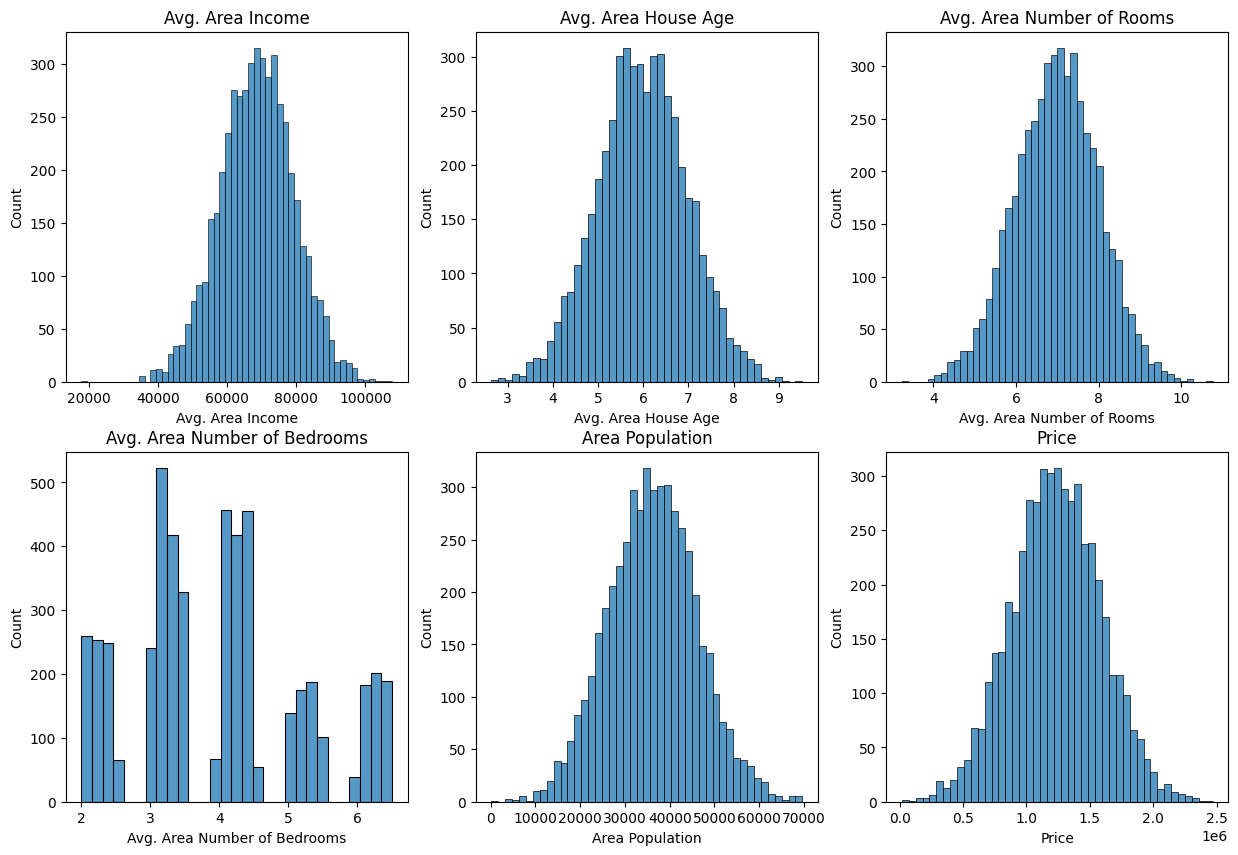

In [454]:
# Plot all the numeric distributions in one plot
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for variable, subplot in zip(housing_df.iloc[:, :6].columns, ax.flatten()):
    sns.histplot(housing_df[variable], ax=subplot)
    subplot.set_title(variable)
plt.show()


In [455]:
# Standardization
scaler_standard = StandardScaler()
housing_standardized = pd.DataFrame(scaler_standard.fit_transform(housing_df.iloc[:, :6]),
                                    columns=housing_df.columns[:6])

housing_standardized.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,6.039613e-18,-2.440714e-16,-5.115908e-16,-2.088996e-16,4.035883e-16,2.202682e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-4.765584e+00,-3.361975e+00,-3.730214e+00,-1.605598e+00,-3.626413e+00,-3.444336e+00
25%,-6.664724e-01,-6.606490e-01,-6.846171e-01,-6.817833e-01,-6.810902e-01,-6.641384e-01
50%,2.075434e-02,-6.852313e-03,1.502401e-02,5.564767e-02,3.616311e-03,1.690042e-03
75%,6.756386e-01,6.794590e-01,6.742146e-01,4.122077e-01,6.748621e-01,6.772856e-01
max,3.670725e+00,3.572745e+00,3.750297e+00,2.041039e+00,3.371219e+00,3.503412e+00


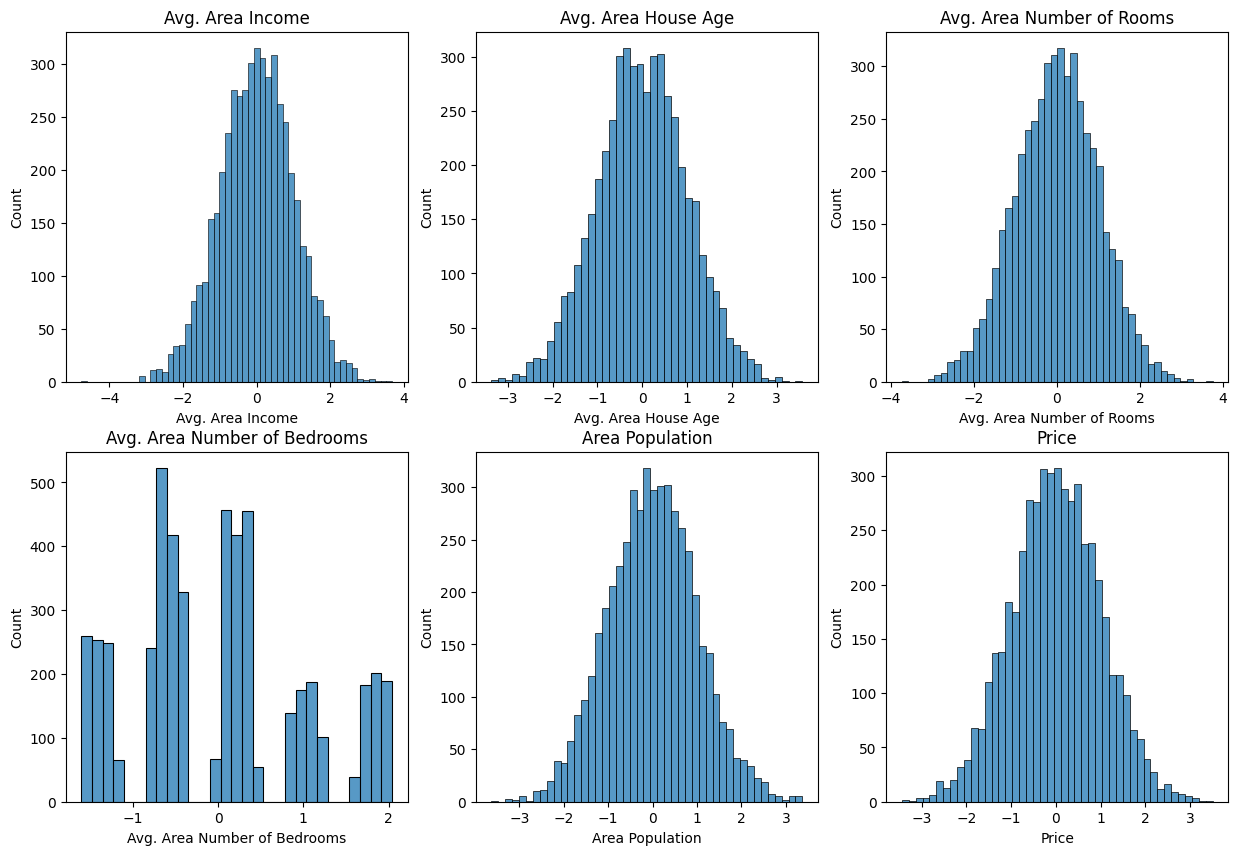

In [456]:
# Plot all the numeric distributions in one plot again
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for variable, subplot in zip(housing_standardized.columns, ax.flatten()):
    sns.histplot(housing_standardized[variable], ax=subplot)
    subplot.set_title(variable)
plt.show()

In [457]:
# Min-max scaling
scaler_minmax = MinMaxScaler()
housing_minmax = pd.DataFrame(scaler_minmax.fit_transform(housing_df.iloc[:, :6]),
                              columns=housing_df.columns[:6])

housing_minmax.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.564890,0.484803,0.498658,0.440296,0.518234,0.495748
std,0.118547,0.144216,0.133694,0.274253,0.142920,0.143946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.485889,0.389536,0.407138,0.253333,0.420903,0.400158
50%,0.567350,0.483815,0.500666,0.455556,0.518751,0.495992
75%,0.644977,0.582783,0.588787,0.553333,0.614676,0.593231
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


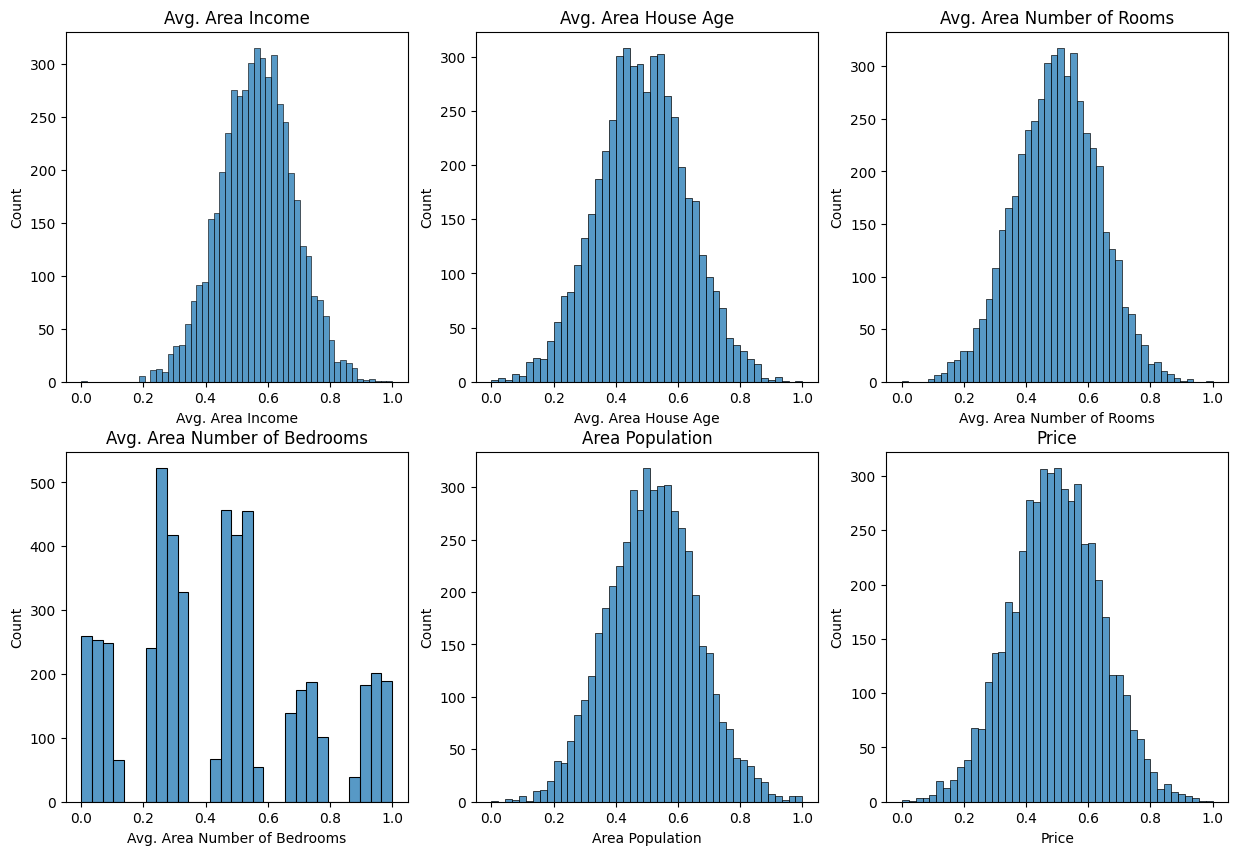

In [458]:
# Plot all the numeric distributions in one plot again
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for variable, subplot in zip(housing_minmax.columns, ax.flatten()):
    sns.histplot(housing_minmax[variable], ax=subplot)
    subplot.set_title(variable)
plt.show()

In [459]:
# Robust scaling
scaler_robust = RobustScaler()
housing_robust = pd.DataFrame(scaler_robust.fit_transform(housing_df.iloc[:, :6]),
                              columns=housing_df.columns[:6])

housing_robust.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03
mean,-1.546395e-02,5.113254e-03,-1.105656e-02,-0.050867,-2.666990e-03,-1.259886e-03
std,7.451694e-01,7.462832e-01,7.359999e-01,0.914176,7.375628e-01,7.455510e-01
min,-3.566277e+00,-2.503621e+00,-2.756219e+00,-1.518519,-2.677107e+00,-2.568931e+00
25%,-5.120491e-01,-4.878687e-01,-5.148843e-01,-0.674074,-5.049636e-01,-4.963594e-01
50%,5.087077e-16,-3.342595e-16,3.249557e-16,0.000000,-2.703323e-16,-2.457886e-16
75%,4.879509e-01,5.121313e-01,4.851157e-01,0.325926,4.950364e-01,5.036406e-01
max,2.719574e+00,2.671126e+00,2.748886e+00,1.814815,2.483570e+00,2.610452e+00


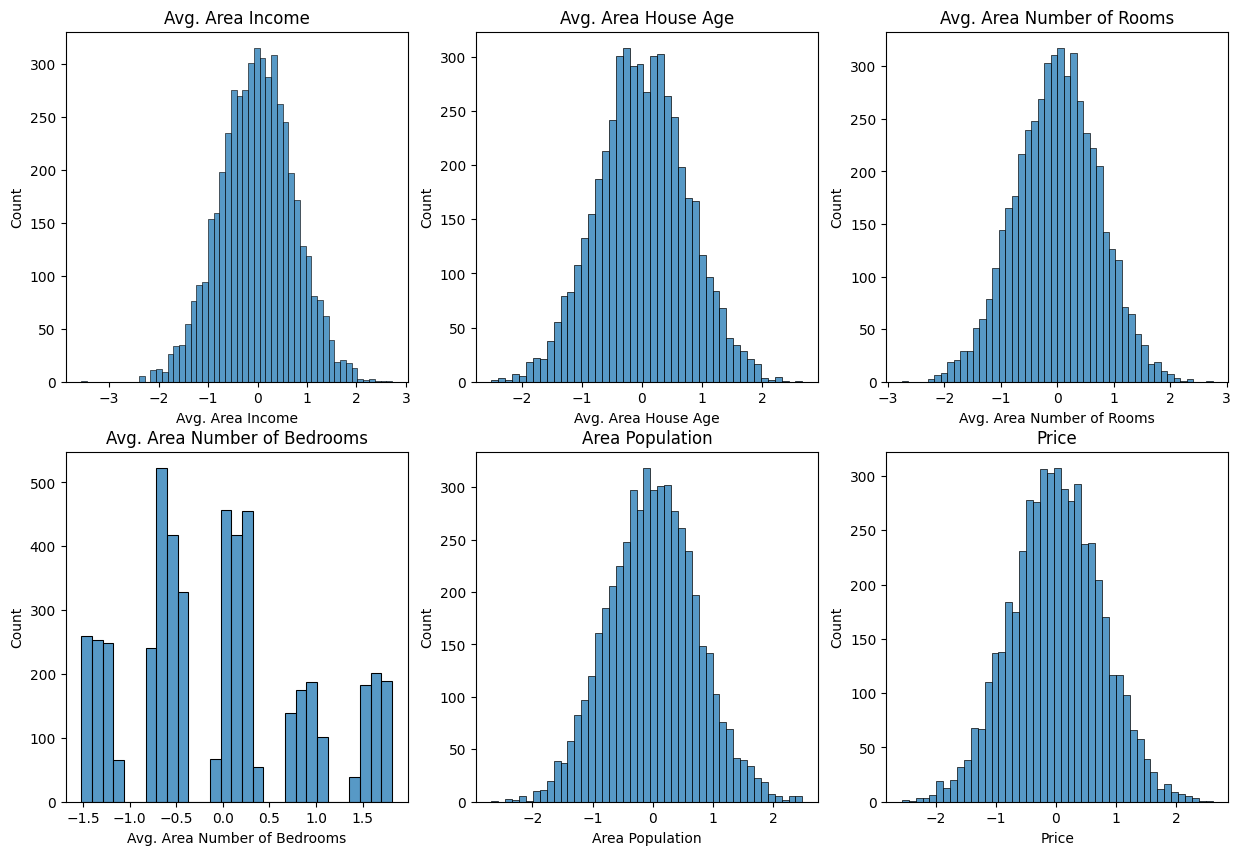

In [460]:
# Plot all the numeric distributions in one plot again
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for variable, subplot in zip(housing_robust.columns, ax.flatten()):
    sns.histplot(housing_robust[variable], ax=subplot)
    subplot.set_title(variable)
plt.show()

In this section, we applied different feature scaling techniques, including standardization (transforming features to have zero mean and unit variance), min-max scaling (scaling features to a specific range, usually between 0 and 1), and robust scaling (scaling features using robust statistics like median and interquartile range). Each technique has its own characteristics and is suitable for different scenarios.

## 4. Encoding Categorical Variables

Categorical variables are variables that take on a limited number of distinct values or categories. Machine learning algorithms typically require numerical inputs, so we need to encode categorical variables into numerical representations. There are several encoding techniques available, depending on the nature of the categorical variable (nominal or ordinal) and the specific requirements of the algorithm.

Let's explore different encoding techniques.

In [461]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [462]:
# One-Hot Encoding
encoder_onehot = OneHotEncoder(handle_unknown='ignore')
titanic_onehot = pd.DataFrame(encoder_onehot.fit_transform(titanic_df[['Sex']]).toarray(),
                              columns=encoder_onehot.get_feature_names_out(['Sex']))
titanic_onehot.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [463]:
# Label Encoding
encoder_label = LabelEncoder()
titanic_label = titanic_df.copy()
titanic_label['Sex'] = encoder_label.fit_transform(titanic_label['Sex'])
titanic_label.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [464]:
# Ordinal Encoding
encoder_ordinal = OrdinalEncoder()
titanic_ordinal = titanic_df.copy()
titanic_ordinal['Sex'] = encoder_ordinal.fit_transform(titanic_ordinal[['Sex']])
titanic_ordinal.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [465]:
# Ordinal Encoding
titanic_ordinal['Embarked'] = encoder_ordinal.fit_transform(titanic_ordinal[['Embarked']])
titanic_ordinal.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,2.0


In this section, we demonstrated different encoding techniques for categorical variables. One-Hot Encoding creates binary dummy variables for each category, Label Encoding assigns unique numerical labels to each category, and Ordinal Encoding assigns numerical labels based on the order or hierarchy of the categories. The choice of encoding technique depends on the nature of the categorical variable and the requirements of the machine learning algorithm.

## 5. Feature Engineering

Feature engineering is the process of creating new features from existing data to capture additional information, relationships, or domain knowledge that can improve the performance of machine learning models. It involves transforming, combining, or extracting relevant features based on the specific problem and dataset.

Let's explore some feature engineering techniques.

In [466]:
# Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
housing_poly = pd.DataFrame(poly_features.fit_transform(housing_df.iloc[:, :6]),
                            columns=poly_features.get_feature_names_out(housing_df.columns[:6]))
housing_poly.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Avg. Area Income^2,Avg. Area Income Avg. Area House Age,Avg. Area Income Avg. Area Number of Rooms,Avg. Area Income Avg. Area Number of Bedrooms,...,Avg. Area Number of Rooms^2,Avg. Area Number of Rooms Avg. Area Number of Bedrooms,Avg. Area Number of Rooms Area Population,Avg. Area Number of Rooms Price,Avg. Area Number of Bedrooms^2,Avg. Area Number of Bedrooms Area Population,Avg. Area Number of Bedrooms Price,Area Population^2,Area Population Price,Price^2
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,6.327480e+09,452045.809848,557549.085038,325340.925551,...,49.128718,28.667580,161819.728324,7.422965e+06,16.7281,94425.014045,4.331447e+06,5.330004e+08,2.444970e+10,1.121552e+12
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,6.280347e+09,475721.660547,533408.428330,244878.305170,...,45.303952,20.798237,270397.758560,1.013588e+07,9.5481,124134.793005,4.653203e+06,1.613876e+09,6.049626e+10,2.267707e+12
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,3.756105e+09,359503.184695,521720.097887,314402.654633,...,72.466528,43.670292,313967.770002,9.014876e+06,26.3169,189205.477722,5.432608e+06,1.360294e+09,3.905776e+10,1.121456e+12
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,4.012619e+09,455340.540974,353892.668379,206505.482563,...,31.211537,18.212735,191682.017121,7.042724e+06,10.6276,111851.391626,4.109611e+06,1.177193e+09,4.325207e+10,1.589155e+12
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,3.597864e+09,302343.535547,470223.704282,253724.694283,...,61.456001,33.160610,206600.083864,4.946211e+06,17.8929,111477.883058,2.668891e+06,6.945391e+08,1.662795e+10,3.980897e+11


In [467]:
housing_poly.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price',
       'Avg. Area Income^2', 'Avg. Area Income Avg. Area House Age',
       'Avg. Area Income Avg. Area Number of Rooms',
       'Avg. Area Income Avg. Area Number of Bedrooms',
       'Avg. Area Income Area Population', 'Avg. Area Income Price',
       'Avg. Area House Age^2',
       'Avg. Area House Age Avg. Area Number of Rooms',
       'Avg. Area House Age Avg. Area Number of Bedrooms',
       'Avg. Area House Age Area Population', 'Avg. Area House Age Price',
       'Avg. Area Number of Rooms^2',
       'Avg. Area Number of Rooms Avg. Area Number of Bedrooms',
       'Avg. Area Number of Rooms Area Population',
       'Avg. Area Number of Rooms Price', 'Avg. Area Number of Bedrooms^2',
       'Avg. Area Number of Bedrooms Area Population',
       'Avg. Area Number of Bedrooms Price', 'Area Population^2',
       'Area Population Price', '

In [468]:
housing_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [469]:
# Interaction features
housing_interact = housing_df.copy()
housing_interact[
    'Avg. Area Bedrooms per Room'
    ] = housing_interact[
        'Avg. Area Number of Bedrooms'
        ] / housing_interact[
            'Avg. Area Number of Rooms'
            ]
housing_interact.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg. Area Bedrooms per Room
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.583520
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",0.459082
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",0.602627
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820,0.583526
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386,0.539583


In [470]:
housing_interact.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Avg. Area Bedrooms per Room
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,0.570086
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,0.156802
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,0.288248
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05,0.439752
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06,0.562197
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06,0.686835
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06,1.103377


In this section, we demonstrated two feature engineering techniques: creating polynomial features and interaction features. Polynomial features generate new features by raising existing features to different powers, capturing non-linear relationships. Interaction features combine existing features through mathematical operations to capture interactions or relationships between variables. Feature engineering requires domain knowledge and creativity to create meaningful and informative features.

## 6. Handling Imbalanced Data

Imbalanced data refers to datasets where the classes are not equally represented, with one or more classes having significantly fewer instances compared to the others. Imbalanced data can pose challenges for machine learning algorithms, as they tend to be biased towards the majority class. Handling imbalanced data is important to ensure that the model can effectively learn and predict the minority class.

Let's explore techniques for handling imbalanced data.

In [471]:
# Simulate imbalanced dataset
housing_imbalanced = housing_df.copy()
housing_imbalanced['Price'] = pd.cut(housing_imbalanced['Price'], bins=[0, 200000, 500000, 1000000, np.inf], labels=[0, 1, 2, 3])
housing_imbalanced['Price'].value_counts()

Price
3    3737
2    1166
1      91
0       6
Name: count, dtype: int64

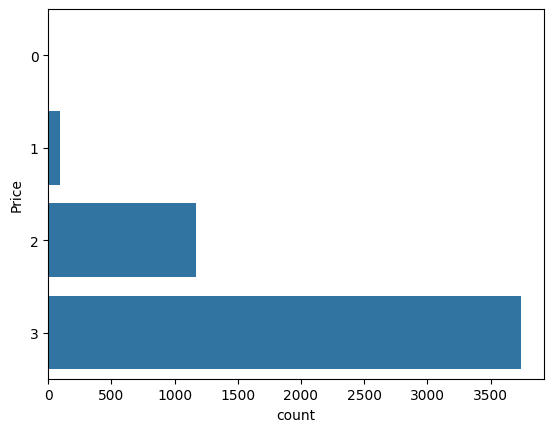

In [472]:
# Plot the imbalanced dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(housing_imbalanced['Price'])
plt.show()

In [473]:
# Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(housing_imbalanced.iloc[:, :6], housing_imbalanced['Price'])
pd.Series(y_resampled).value_counts()

Price
0    3737
1    3737
2    3737
3    3737
Name: count, dtype: int64

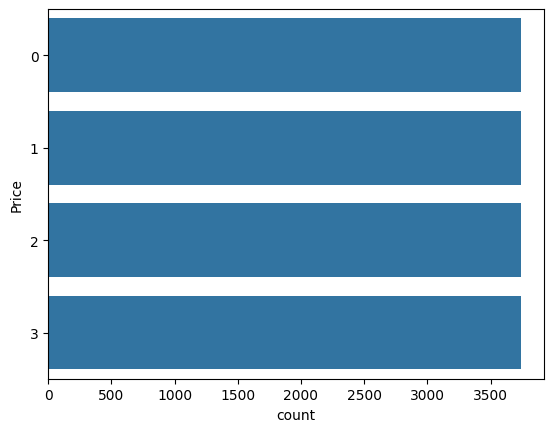

In [474]:
# Plot the balanced dataset
sns.countplot(y_resampled)
plt.show()

In [475]:
# SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(housing_imbalanced.iloc[:, :6], housing_imbalanced['Price'])
pd.Series(y_resampled).value_counts()

Price
0    3737
1    3737
2    3737
3    3737
Name: count, dtype: int64

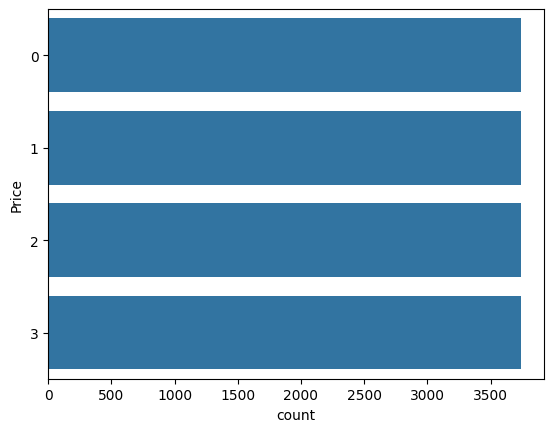

In [476]:
# Plot the balanced dataset
sns.countplot(y_resampled)
plt.show()

In [477]:
# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(housing_imbalanced.iloc[:, :6], housing_imbalanced['Price'])
pd.Series(y_resampled).value_counts()

Price
0    6
1    6
2    6
3    6
Name: count, dtype: int64

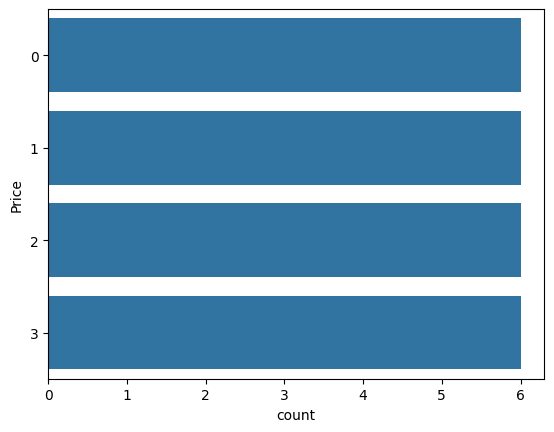

In [478]:
# Plot the balanced dataset
sns.countplot(y_resampled)
plt.show()

In [479]:
# Tomek Links Undersampling
tomek = TomekLinks(sampling_strategy='auto')
X_tomek, y_tomek = tomek.fit_resample(housing_imbalanced.iloc[:, :6], housing_imbalanced['Price'])
pd.Series(y_tomek).value_counts()

Price
3    3377
2     776
1      49
0       6
Name: count, dtype: int64

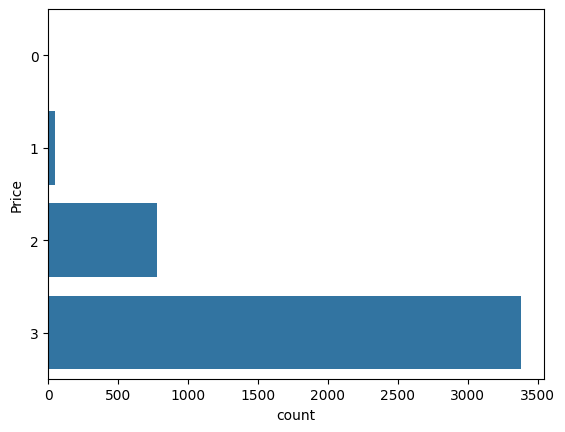

In [480]:
# Plot the balanced dataset
sns.countplot(y_tomek)
plt.show()

In this section, we explored techniques for handling imbalanced data, including oversampling methods (Random Oversampling and SMOTE) and undersampling methods (Random Undersampling and Tomek Links Undersampling). Oversampling techniques increase the number of instances in the minority class, while undersampling techniques reduce the number of instances in the majority class. The goal is to balance the class distribution and improve the model's ability to learn from the minority class.

## 7. Preprocessing Pipelines

Preprocessing pipelines allow us to streamline and automate the preprocessing steps in a machine learning workflow. By chaining multiple preprocessing steps together, we can ensure consistency, reproducibility, and efficiency in applying the preprocessing techniques to new data. Scikit-learn provides the Pipeline and ColumnTransformer classes to create preprocessing pipelines.

Let's build a preprocessing pipeline for the housing dataset.

In [481]:
# Define the preprocessing steps
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, ['Age', 'Fare']),
    ('cat', cat_pipeline, ['Sex', 'Embarked'])
])

In [482]:
# Create the final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [483]:
# Split the data into training and testing sets
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [484]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [485]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [486]:
# Evaluate the pipeline
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.776536312849162

In [487]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In this section, we built a preprocessing pipeline that includes imputation for missing values, scaling of numerical features, and one-hot encoding of categorical features. We used the Pipeline class to chain the preprocessing steps together and the ColumnTransformer to apply different preprocessing techniques to different subsets of columns. Finally, we integrated the preprocessing pipeline with a logistic regression classifier and evaluated its performance on the housing dataset.

## 8. Conclusion

In this notebook, we explored various advanced data preprocessing techniques beyond basic data cleaning. We covered handling missing data, feature scaling, encoding categorical variables, feature engineering, handling imbalanced data, and building preprocessing pipelines.

Key takeaways:

* Handling missing data is crucial to avoid biased or inaccurate results. Techniques like deletion, simple imputation, KNN imputation, and MICE can be used depending on the missing data patterns and the specific dataset.
* Feature scaling is important when working with machine learning algorithms that are sensitive to the scale of the features. Standardization, min-max scaling, and robust scaling are common techniques for feature scaling.
* Encoding categorical variables is necessary to convert them into numerical representations suitable for machine learning algorithms. One-Hot Encoding, Label Encoding, and Ordinal Encoding are popular encoding techniques.
* Feature engineering involves creating new features from existing data to capture additional information or relationships. Polynomial features, interaction features, and domain-specific features can improve model performance.
* Handling imbalanced data is essential to ensure that the model can effectively learn and predict the minority class. Oversampling techniques like Random Oversampling and SMOTE, and undersampling techniques like Random Undersampling and Tomek Links Undersampling can be used to balance the class distribution.
* Preprocessing pipelines streamline and automate the preprocessing steps in a machine learning workflow. Scikit-learn's Pipeline and ColumnTransformer classes are powerful tools for creating preprocessing pipelines.

Remember, data preprocessing is an iterative process that requires understanding the data, domain knowledge, and experimentation. It is essential to evaluate the impact of preprocessing techniques on model performance and interpret the results in the context of the specific problem and dataset.